Copyright 2019 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

# Tabula Muris Data

This will generate the Tabulamuris data used.

The [TabulaMurisData](http://bioconductor.org/packages/release/data/experiment/html/TabulaMurisData.html) was of huge help here !

In [1]:
library(Seurat)
suppressPackageStartupMessages({
    library(ExperimentHub)
    library(SingleCellExperiment)
    library(TabulaMurisData)
})
#> snapshotDate(): 2018-10-31
library(scater)
library(scran)
library(ggplot2)

snapshotDate(): 2018-10-30
Loading required package: ggplot2

Attaching package: 'scater'

The following object is masked from 'package:S4Vectors':

    rename

The following object is masked from 'package:stats':

    filter



In [2]:
run_qc <- function(sce) {
  isSpike(sce, "ERCC") <- grepl("^ERCC", rownames(sce))
  sce <- calculateQCMetrics(sce)

  # Identify outliers, but without using the mouse as a batch
  libsize.drop <- isOutlier(sce$total_counts, nmads=3, type="lower", log=TRUE)
  feature.drop <- isOutlier(sce$total_features_by_counts, nmads=3, type="lower", log=TRUE)
  spike.drop <- isOutlier(sce$pct_counts_ERCC, nmads=3, type="higher")
  keep <- !(libsize.drop | feature.drop | spike.drop)
  sce <- sce[,keep]

  num.cells <- nexprs(sce, byrow=TRUE)
  to.keep <- num.cells > 0
  sce <- sce[to.keep,]
  sce
}

In [3]:
eh <- ExperimentHub()
#> snapshotDate(): 2018-10-31
query(eh, "TabulaMurisData")

snapshotDate(): 2018-10-30


ExperimentHub with 2 records
# snapshotDate(): 2018-10-30 
# $dataprovider: Tabula Muris Consortium
# $species: Mus musculus
# $rdataclass: SingleCellExperiment
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["EH1617"]]' 

           title               
  EH1617 | TabulaMurisDroplet  
  EH1618 | TabulaMurisSmartSeq2

In [4]:
sce <- eh[["EH1618"]]
sce <- sce[, sce$tissue == 'Skin' |
    sce$tissue == 'Large_Intestine' |
    sce$tissue == 'Spleen' |
    sce$tissue == 'Brain_Myeloid']

sce <- run_qc(sce)

see ?TabulaMurisData and browseVignettes('TabulaMurisData') for documentation
downloading 0 resources
loading from cache 
    '/root//.ExperimentHub/1618'


In [5]:
sce$label <- sce$tissue
sce$subtissue[is.na(sce$subtissue)] <- 'None'
sce$cell_ontology_class[is.na(sce$cell_ontology_class)] <- 'None'                              
sce$cell_ontology_id[is.na(sce$cell_ontology_id)] <- 'None'                                    
sce$free_annotation[is.na(sce$free_annotation)] <- 'None'                                      
sce$FACS_selection[is.na(sce$FACS_selection)] <- 'None' 
write.csv(as.matrix(counts(sce)), 'tm_tissue_mix.12k.counts.csv')
write.csv(colData(sce), 'tm_tissue_mix.12k.metadata.csv')
write.csv(rowData(sce), 'tm_tissue_mix.12k.featuredata.csv')
saveRDS(sce, paste('cell_mix/tm_tissue_mix.12k', 'rds', sep='.'))

In [6]:
sce

class: SingleCellExperiment 
dim: 22872 12081 
metadata(0):
assays(1): counts
rownames(22872): 0610005C13Rik 0610007C21Rik ... Zzef1 Zzz3
rowData names(10): ID Symbol ... total_counts log10_total_counts
colnames(12081): A1.B000126.3_39_F.1.1 A1.B000826.3_39_F.1.1 ...
  P9.MAA001869.3_38_F.1.1 P9.MAA001871.3_39_F.1.1
colData names(48): cell plate_barcode ...
  pct_counts_in_top_500_features_ERCC label
reducedDimNames(0):
spikeNames(1): ERCC

In [46]:
dat <- as.Seurat(sce, counts='counts', data='counts')
dat <- NormalizeData(dat)
dat <- FindVariableFeatures(dat)
all.genes <- rownames(dat)
dat <- ScaleData(dat, features = all.genes)
dat <- RunPCA(dat)

Centering and scaling data matrix


PC_ 1 
Positive:  Lgals4, Cldn7, Epcam, Krt8, Tspan1, Cldn3, Tspan8, Krt19, Tmem45b, Elf3 
	   Muc13, Ceacam1, 2210415F13Rik, Oit1, Pigr, Slc44a4, Car2, Phgr1, Ckmt1, Ethe1 
	   B4galnt2, Mgst3, Krt18, Gale, 9130017N09Rik, Tsc22d1, Cdhr5, Guca2a, Klk1, Gmds 
Negative:  Csf1r, Cx3cr1, Olfml3, Rac2, Itgam, Rab3il1, Mpeg1, Lrrc3, Hvcn1, Pros1 
	   Fgd2, Il10ra, Gna15, Cd52, Tbxas1, Stab1, Slc29a3, Nckap1l, Ccr5, Abca9 
	   Ets1, Il21r, Havcr2, Sash3, Lyz2, Slc7a8, Cd33, Slc11a1, Cd300a, C3ar1 
PC_ 2 
Positive:  Csf1r, Cx3cr1, Olfml3, Rac2, Ceacam1, Cd52, Plac8, Itgam, Hvcn1, Lgals4 
	   Rab3il1, Mpeg1, Krt8, Cldn3, Cldn7, Cnp, Tspan1, Il10ra, Fgd2, 2210415F13Rik 
	   Muc13, Lrrc3, Krt19, Sash3, Tmem45b, Lsp1, Tbxas1, Nckap1l, Phgr1, Pglyrp1 
Negative:  Lgals7, Krt5, Trim29, Krt15, Anxa8, Dmkn, Col17a1, Hspb1, Crip2, Perp 
	   Apoe, Anxa1, 1190003J15Rik, Serpinb5, Ptrf, Tgfbi, Ecm1, Mt2, Cxcl14, Sfn 
	   Aqp3, Anxa2, Gsn, Cav1, Gata3, Mt1, Ptn, Krt14, Sbsn, Ccl27a 
PC_ 3 
Positive:  Ptprca

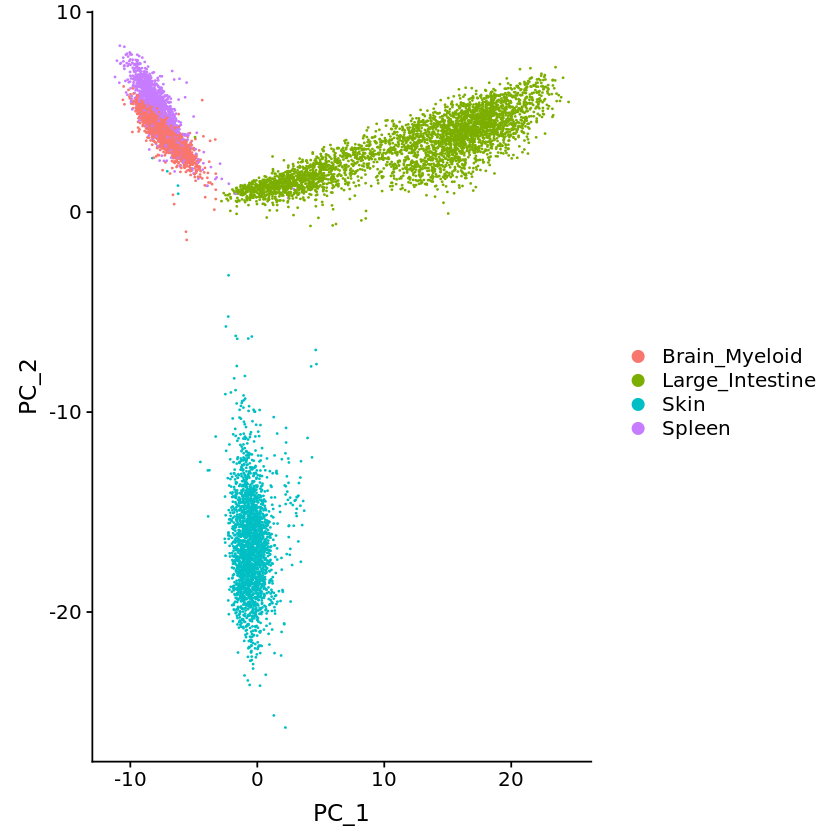

In [47]:
DimPlot(dat, reduction = 'pca', group.by = 'tissue')

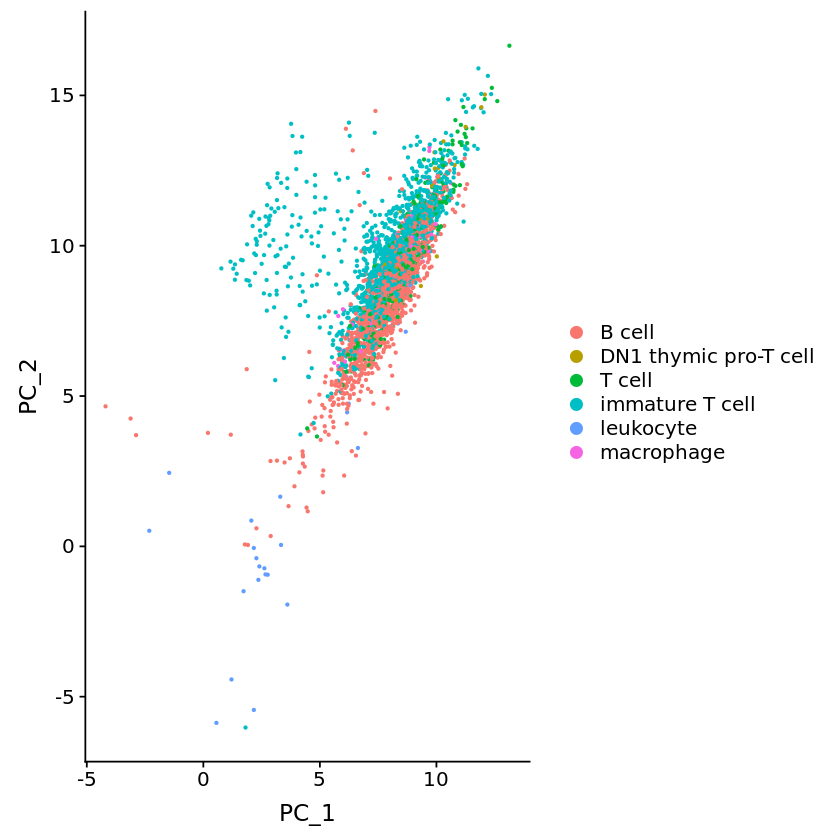

In [10]:
DimPlot(subset(dat, subset = tissue == 'Thymus' | tissue == 'Spleen'), reduction = 'pca', group.by = 'cell_ontology_class')

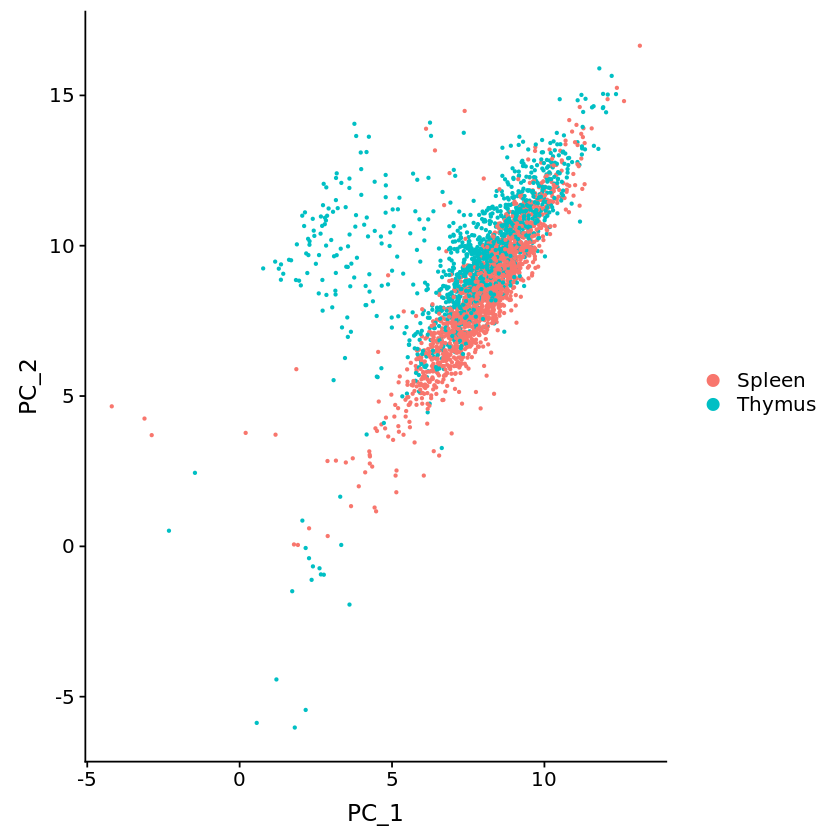

In [16]:
DimPlot(subset(dat, subset = tissue == 'Thymus' | tissue == 'Spleen'), reduction = 'pca', group.by = 'tissue')

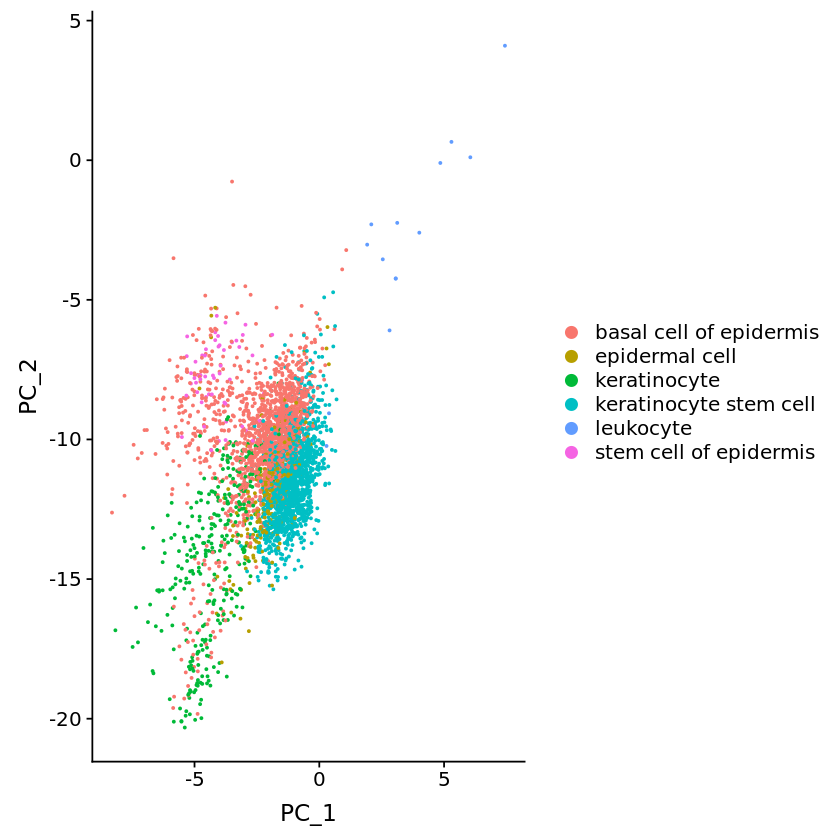

In [11]:
DimPlot(subset(dat, subset = tissue == 'Skin' | tissue == 'Tongue'), reduction = 'pca', group.by = 'cell_ontology_class')

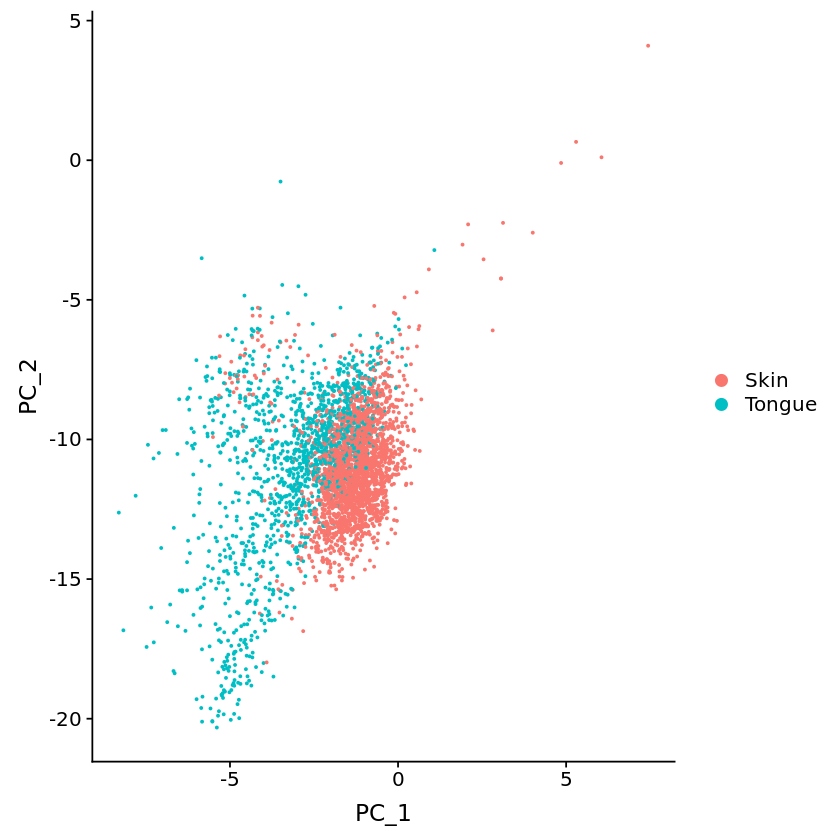

In [15]:
DimPlot(subset(dat, subset = tissue == 'Skin' | tissue == 'Tongue'), reduction = 'pca', group.by = 'tissue')

In [48]:
dat <- RunUMAP(dat, dims=1:10)

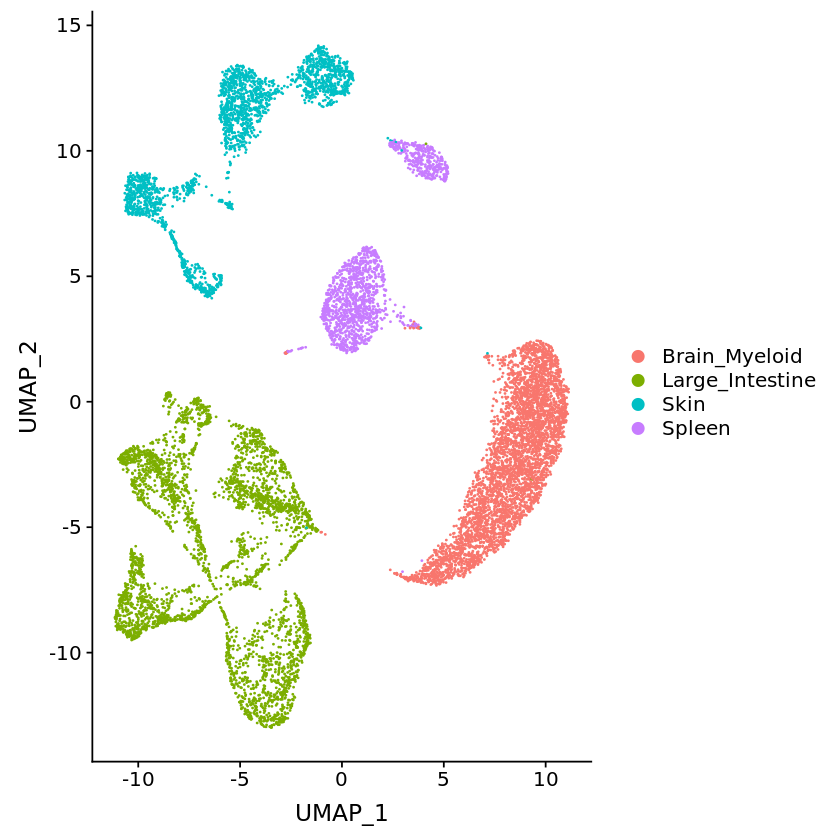

In [49]:
DimPlot(dat, reduction = 'umap', group.by = 'tissue')

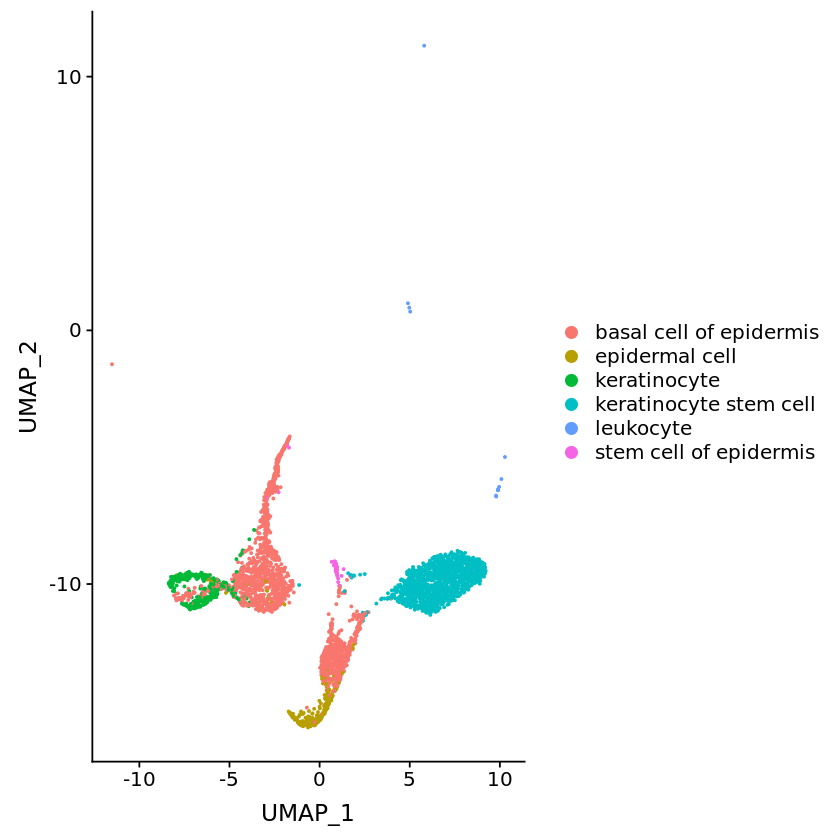

In [20]:
DimPlot(subset(dat, subset = tissue == 'Skin' | tissue == 'Tongue'), reduction = 'umap', group.by = 'cell_ontology_class')

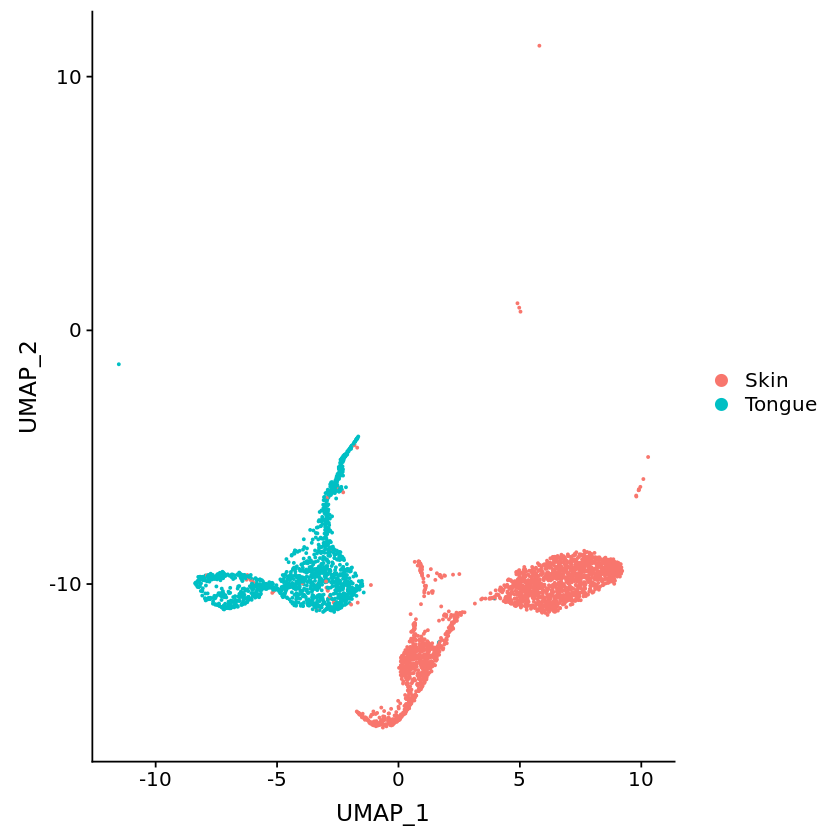

In [24]:
DimPlot(subset(dat, subset = tissue == 'Skin' | tissue == 'Tongue'), reduction = 'umap', group.by = 'tissue')

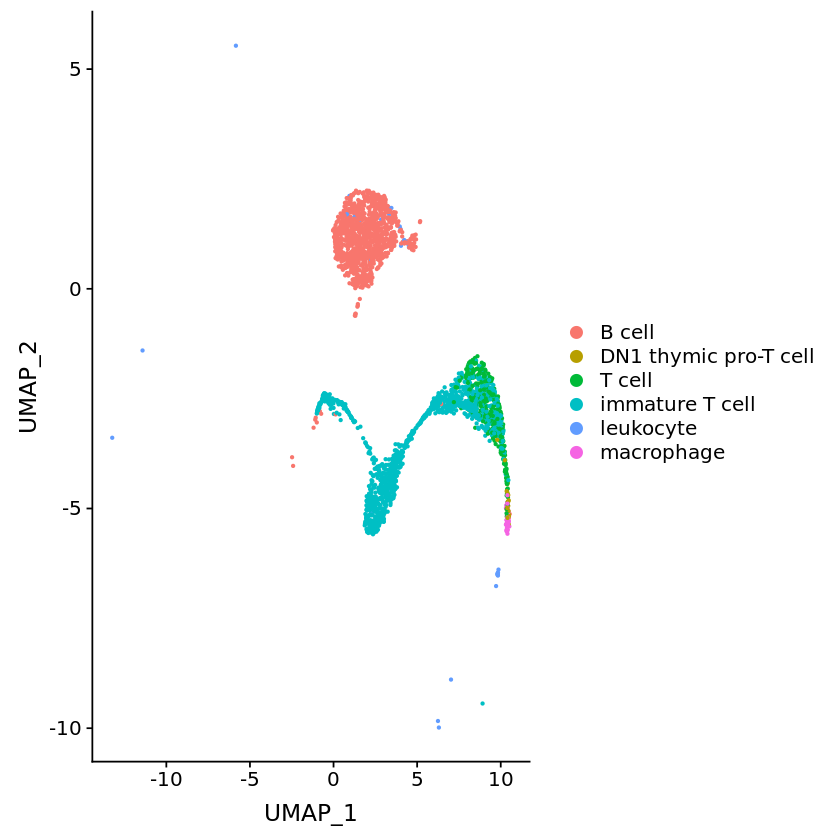

In [25]:
DimPlot(subset(dat, subset = tissue == 'Spleen' | tissue == 'Thymus'), reduction = 'umap', group.by = 'cell_ontology_class')

In [5]:
sce$tissue <- as.factor(sce$tissue)
summary(sce$tissue)

Brain_Myeloid Large_Intestine            Skin          Spleen 
           4762            4149            2464            1718